In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import os
from os import path 
import h5py
import sys
import Initialize_Paths as Paths

# Import Reading Functions
sys.path.insert(0, Paths.Surqct_path  + '/surqct/scripts/Paper_figures/')
from Reading import read_diatdata, read_HDF5, read_pops

In [2]:
pd.set_option('display.max_columns', None)  
sns.set_style('ticks')
plt.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \boldmath']
# plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{tikz} \usepackage[utf8]{inputenc}')
plt.rc('font', family='Times')
sns.set_context("paper")

# Tick parameters
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40
mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 20
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2

plt.rcParams['axes.labelsize'] = 40
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['legend.fontsize'] = 35

<ipython-input-2-cf7c5584ff04>:4: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \boldmath']


In [3]:
SystName    = 'O3_UMN'
# Dimension   = 'prode'
Dimension   = 'nondim'
InelRunNb   = 9
ExchRunNb   = 6
DissRunNb   = 55
ReactionFlgQCT    = '2_1_1_0'
ReactionFlgSurQCT = '2_1_1_0'
TauReactionFlgQCT    = '2_1_1_0'
TauReactionFlgSurQCT = '2_1_1_0'
SaveFigures = True

In [4]:
import Initialize_System
Initialize = getattr(Initialize_System,'Initialize_'+SystName)
System = Initialize()

QCT_ME_path    = Paths.Workspace_path + 'Air_Database/' + System.QCTMEPath
SurQCT_ME_path = Paths.Workspace_path + 'Air_Database/Run_0D_surQCT/' + Dimension + '_RunI'+str(InelRunNb)+'_E'+str(ExchRunNb)+'_D'+str(DissRunNb)+'/'

Data_ME_path   = Paths.Surqct_path + '0D/Data/' + System.Name + '/' + Dimension + '_RunI'+str(InelRunNb)+'_E'+str(ExchRunNb)+'_D'+str(DissRunNb)+'/'
Figure_ME_path = Paths.Surqct_path + '0D/Figures/' + System.Name + '/' + Dimension + '_RunI'+str(InelRunNb)+'_E'+str(ExchRunNb)+'_D'+str(DissRunNb)+'/'

try:
    os.makedirs(Data_ME_path)
except OSError as e:
    pass

try:
    os.makedirs(Figure_ME_path)
except OSError as e:
    pass

print('QCT Master Equation Path    :', QCT_ME_path)
print('SurQCT Master Equation Path :', SurQCT_ME_path)
print('Data Master Equation Path   :', Data_ME_path)
print('Figures Master Equation Path:', Figure_ME_path)


QCT Master Equation Path    : /home/venturi/WORKSPACE/Air_Database/Run_0D/
SurQCT Master Equation Path : /home/venturi/WORKSPACE/Air_Database/Run_0D_surQCT/nondim_RunI9_E6_D55/
Data Master Equation Path   : /home/venturi/WORKSPACE/SurQCT/0D/Data/O3_UMN/nondim_RunI9_E6_D55/
Figures Master Equation Path: /home/venturi/WORKSPACE/SurQCT/0D/Figures/O3_UMN/nondim_RunI9_E6_D55/


In [5]:
FileName = Data_ME_path+'Depletion_Delay.csv'
DepDelay=pd.read_csv(FileName)

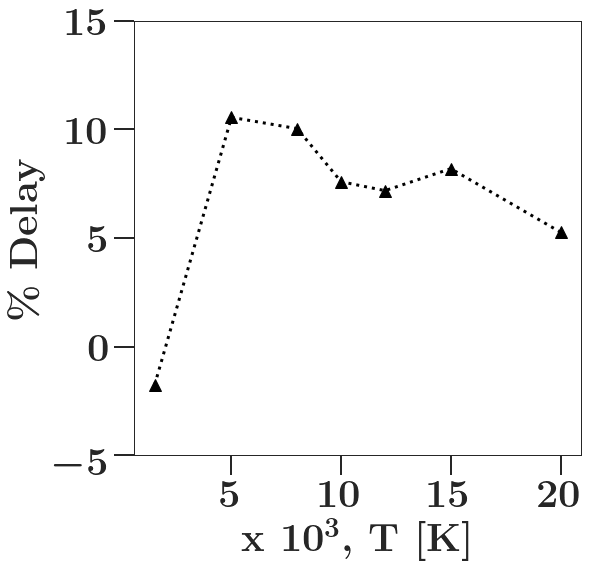

In [7]:
# NH
fig,ax = plt.subplots(1,1,figsize=(8,8))

plt.plot(DepDelay.Temp,-100.0*DepDelay.Delay,':k^',markersize=12,linewidth=3.0)

plt.xlabel('\\textbf{x }$10^3$\\textbf{, T [K]}')
plt.ylabel('\\textbf{\% Delay}',labelpad=8)
plt.ylim([-5,15])
ax.set_xticks([5000, 10000, 15000, 20000])
ax.set_xticklabels(['\\textbf{5}','\\textbf{10}','\\textbf{15}','\\textbf{20}'])
if(SaveFigures):
    plt.savefig((Figure_ME_path+'DepletionDelay.pdf'), format='pdf', dpi=600, bbox_inches = 'tight')


In [ ]:
DepDelay.Delay